In [176]:
#! /usr/bin/env python3

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# plt.rc('font',family='Times New Roman') 
config = {
    "font.family":'serif',
    "font.size": 18,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)


In [177]:
# 读入文件，设置分隔符为一个或多个空格
fu2 = pd.read_table('/public/home/mayuan/phycollege_workplace/2.disorder_structure/2fu-002and003-ediff-1e-7-ediffg-0.01.dat', sep='\s+')
fu4 = pd.read_table('/public/home/mayuan/phycollege_workplace/2.disorder_structure/4fu-004-ediff-1e-7-ediffg-0.01.dat', sep='\s+')
fu2_number = list(fu2['Number'])
fu2_enthalpy_per_atoms = list(fu2['enthalpy_per_atoms'])
# 选择一个标准值，然后所有的值都减去这个标准值，然后扩大一千倍从eV变成meV
fu2_enthalpy_per_atoms = [1000*(float(e)-3.340864) for e in fu2_enthalpy_per_atoms] 

fu4_number = list(fu4['Number'])
fu4_enthalpy_per_atoms= list(fu4['enthalpy_per_atoms'])
fu4_enthalpy_per_atoms = [1000*(float(e)-3.340864) for e in fu4_enthalpy_per_atoms] 

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


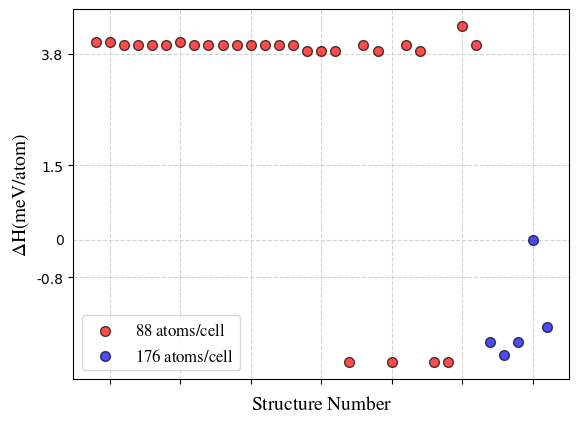

In [213]:
# 用于设置坐标轴刻度标签的字体和字号的
all_number = fu2_number + fu4_number
x_max_number = len(all_number)
x_range = [xi for xi in range(1, x_max_number, 5)]
# labels=[] 横坐标不显示刻度
plt.xticks(labels=[], fontproperties='Times New Roman', size=10, ticks=x_range)

all_enthalpy = fu2_enthalpy_per_atoms + fu4_enthalpy_per_atoms
min_enthalpy = min(all_enthalpy)
max_enthalpy = max(all_enthalpy)
yrange = [yi for yi in  np.linspace(np.floor(min_enthalpy), np.ceil(max_enthalpy)+1, 5)]
plt.yticks(fontproperties='Times New Roman', size=10, ticks=yrange)
# 设置纵坐标刻度保留三位小数
plt.gca().yaxis.set_major_formatter('{:.1f}'.format)


# \mathrm{} 指定了公式中使用正体字体。
# \; 空格
plt.xlabel('$\mathrm{Structure \; Number}$',fontsize=14)
plt.ylabel('$\mathrm{\Delta H (meV/atom)}$',fontsize=14)

# 打网格的虚线不要挡住图中的点 —— 通过设置zorder参数来控制图形元素的绘制顺序，将网格的zorder设为比点的zorder小即可。
plt.scatter(fu2_number, fu2_enthalpy_per_atoms, s=50, c='r', label='$\mathrm{88 \; atoms/cell}$', alpha=0.7, edgecolors='Black', zorder=10)
plt.scatter(fu4_number, fu4_enthalpy_per_atoms, s=50, c='b', label='$\mathrm{176 \; atoms/cell}$', alpha=0.7, edgecolors='Black', zorder=10)
plt.legend(prop={'family':'Times New Roman', 'size': 12})
plt.grid(True, linestyle='--', color='lightgray', zorder=1)\

plt.axhline(y=0, linestyle='--', color='lightgray', linewidth='0.8')
plt.text(-2.9,-0.08,'0', fontsize=10)
plt.show()